In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


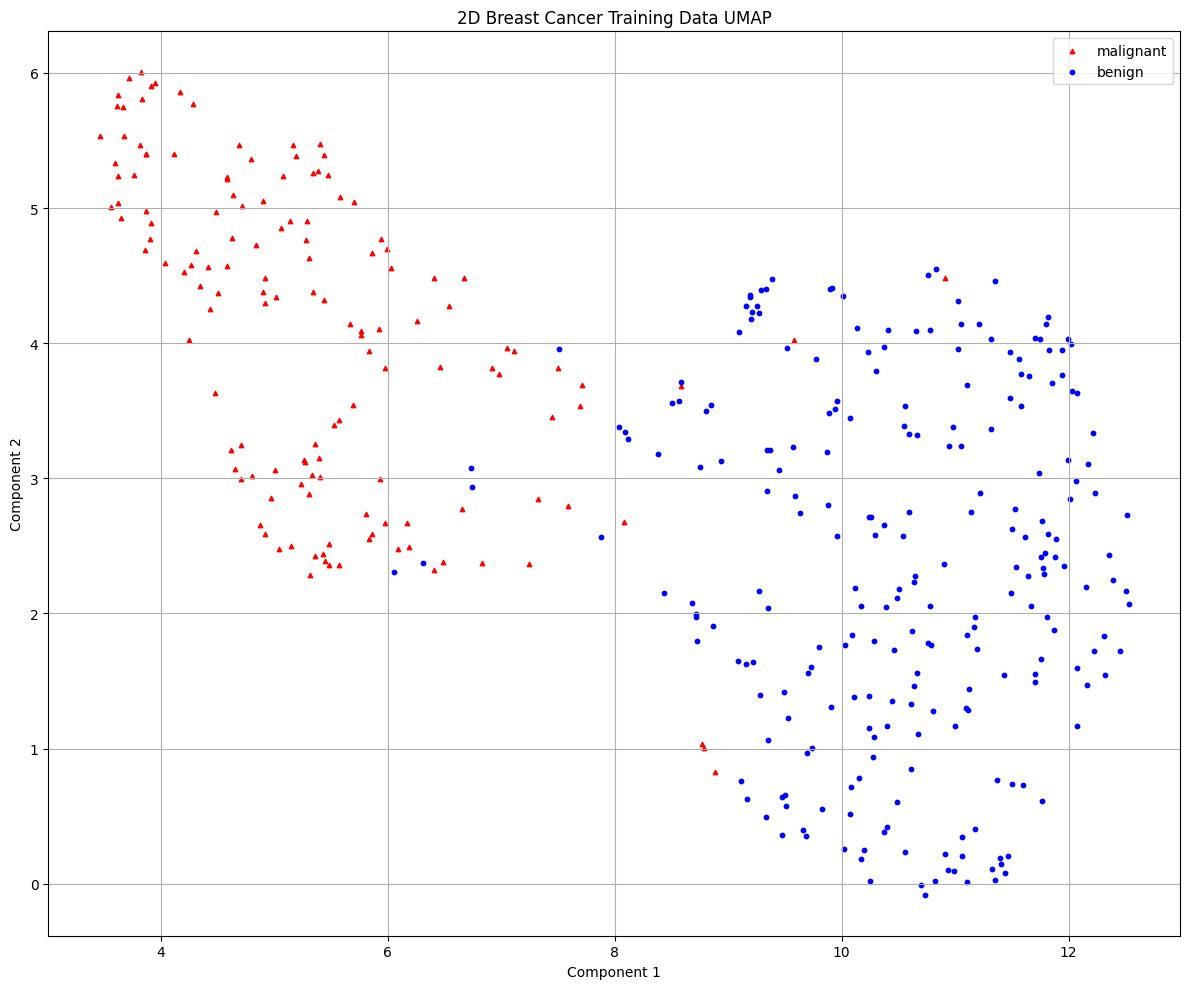

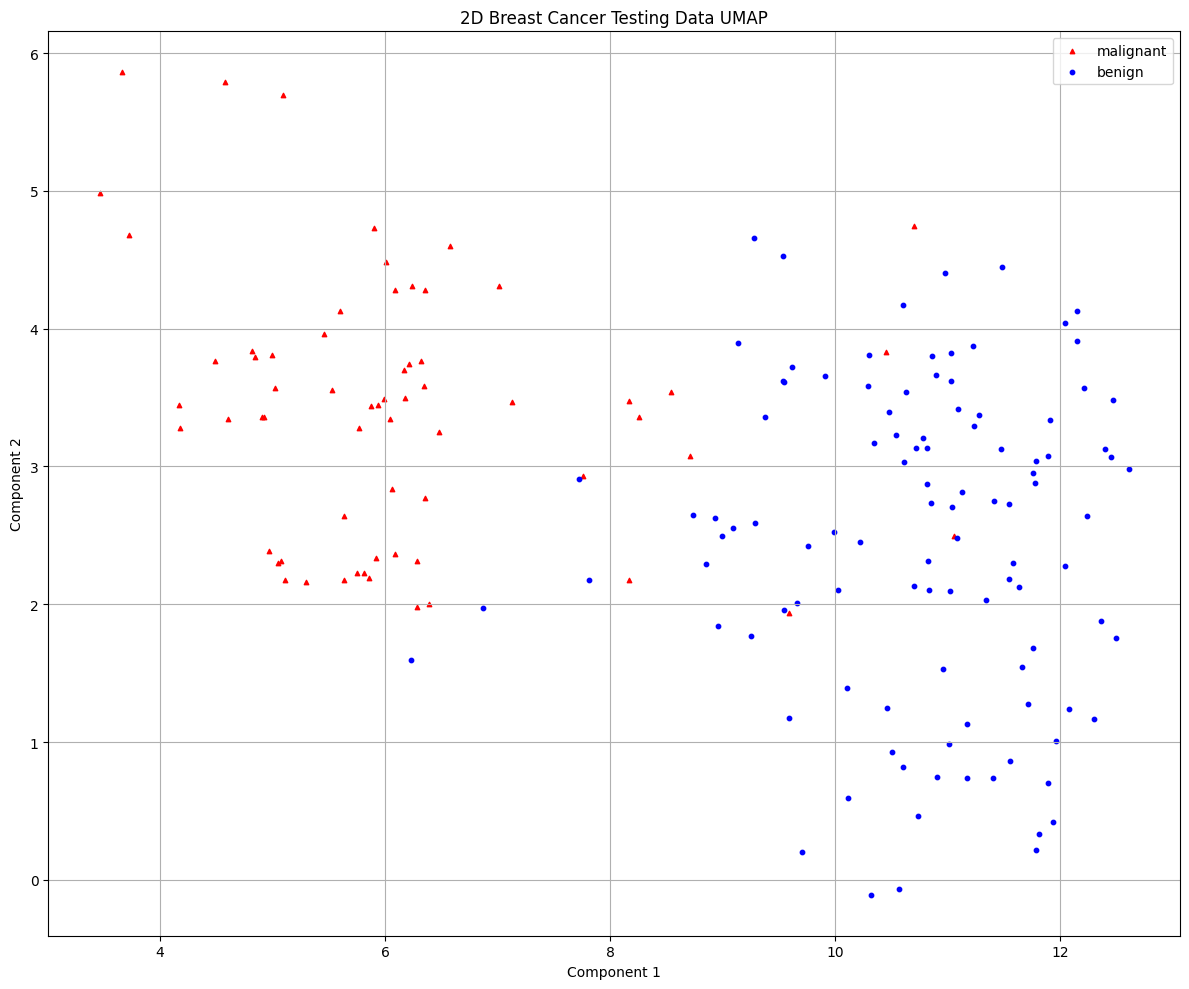

[I 2025-04-27 06:23:13,083] A new study created in memory with name: no-name-2e9426e9-4284-4b39-8f52-5235430d18b2
[I 2025-04-27 06:23:40,406] Trial 0 finished with value: 0.9526315789473685 and parameters: {'n_estimators': 5740, 'learning_rate': 0.1875115694352455, 'num_leaves': 79, 'max_depth': 12, 'min_child_samples': 15, 'subsample': 0.7175751110932593, 'colsample_bytree': 0.9605625312175, 'reg_alpha': 0.07541399850019015, 'reg_lambda': 0.0006624494628780473}. Best is trial 0 with value: 0.9526315789473685.
[I 2025-04-27 06:25:03,112] Trial 1 finished with value: 0.944736842105263 and parameters: {'n_estimators': 2482, 'learning_rate': 0.05250429919052929, 'num_leaves': 88, 'max_depth': 9, 'min_child_samples': 60, 'subsample': 0.8713378201328862, 'colsample_bytree': 0.9802718177369039, 'reg_alpha': 0.016673438156415202, 'reg_lambda': 0.00016609899862037077}. Best is trial 0 with value: 0.9526315789473685.
[I 2025-04-27 06:28:30,501] Trial 2 finished with value: 0.9526315789473685 an

Best trial:
Accuracy: 0.968421052631579
Best hyperparameters:  {'n_estimators': 4309, 'learning_rate': 0.07495687857103922, 'num_leaves': 70, 'max_depth': 5, 'min_child_samples': 64, 'subsample': 0.8213395768138907, 'colsample_bytree': 0.6833680188217272, 'reg_alpha': 4.32173689430146, 'reg_lambda': 0.4611207573680977}


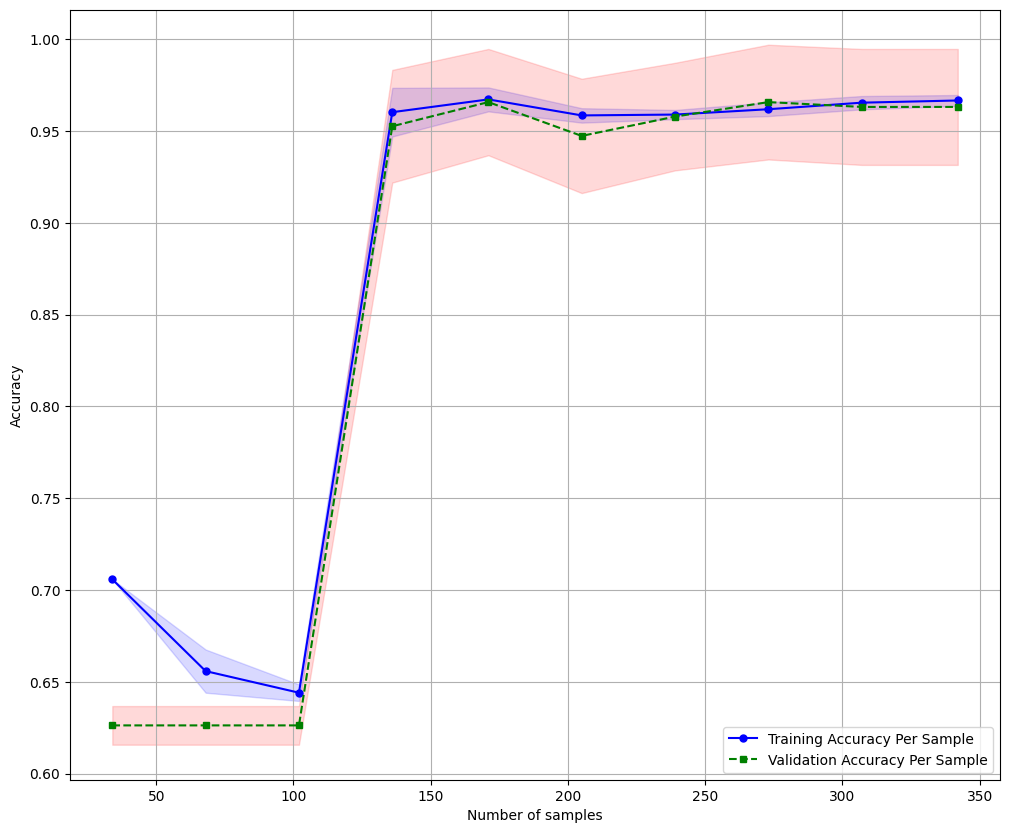

Confusion Matrix
[[ 55   9]
 [  3 104]]
Accuracy: 0.9298, Precision: 0.9204, Recall: 0.9720, F1: 0.9455, AUC: 0.9697


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)